<a href="https://colab.research.google.com/github/fintechutcc/AI-Camp/blob/main/Basic_TensorFlow_with_Text_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic TensorFlow with Text - Lab 2


ตรวจสอบเวอร์ชันของ TensorFlow ที่ติดตั้งใน Google Colab (อาจจะไม่จำเป็นแล้ว ตอนนี้ Colab ได้อัพเกรด TensorFlow เป็นเวอร์ชัน 2 แล้ว)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


ตัวอย่างต่อไปนี้ เป็นการทำ Text Classification สำหรับการคัดแยกข้อความเป็นข้อความประชดประชันหรือไม่ โดยดัดแปลงมาจาก Laurence Moroney ใน deeplearning.ai

## ขั้นตอนที่ 1
ดาวน์โหลดข้อมูลตัวอย่างจากลิงค์ต่อไปนี้:

https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json

## ขั้นตอนที่ 2
เปิดไฟล์และโหลดข้อมูลที่เป็น json เก็บในตัวแปร datastore

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

import json

with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

--2022-05-15 03:36:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2022-05-15 03:36:12 (87.8 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
datastore

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

Labeled Data หรือข้อมูลมีเฉลย

## ขั้นตอนที่ 3
- นำคอลัมน์ headline ใน datastore มาใส่ในตัวแปร sentences
- นำคอลัมน์ is_sarcastic ใน datastore มาใส่ในตัวแปร labels
- นำคอลัมน์ article_link ใน datastore มาใส่ในตัวแปร urls
- แบ่งข้อมูล 20000 อันแรก (ทั้งส่วน sentences และ labels) มาเป็น training_sentences
- ข้อมูลที่เหลือ (6709 ประโยค) ใช้เป็น testing_sentences


In [ ]:
import numpy as np

sentences = []
labels = []
#urls = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  #urls.append(item['article_link'])

training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences  = sentences[training_size:]
print(len(testing_sentences))

training_labels = np.array(labels[0:training_size])
testing_labels  = np.array(labels[training_size:])
print(len(testing_labels))

6709
6709


## Hyper-parameters for modeling

ต่อไปนี้เป็น Hyper-Parameters ที่สามารถปรับได้ ใช้ใน Deep Learning เช่น vocal_size หรือจำนวนคำศัพท์ เป็นต้น

In [ ]:
vocab_size = 20000
embedding_dim = 16
max_length = 64
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

## Modeling:

การสร้างโมเดลใน Deep Learning 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, 
                                maxlen=max_length, 
                                padding=padding_type,
                                truncating=trunc_type)


testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, 
                                maxlen=max_length, 
                                padding=padding_type,
                                truncating=trunc_type)

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 16)            320000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 321,657
Trainable params: 321,657
Non-trainable params: 0
__________________________________________________

## Training:

ตัวอย่างโค้ดในเซลล์ก่อนหน้านี้เป็นการสร้างร่างแบบของโมเดลว่าจะมีเลเยอร์ต่างๆ อย่างไรบ้าง โดยที่ยังไม่มีการนำข้อมูลมาปรับ หรือเรียกว่า Training 

สิ่งที่ต้องกำหนดใน Training คือ จำนวนรอบที่ต้องการรัน (Epoch) เป็นต้น ในกรณีตัวอย่าง ให้รัน 10 รอบ

In [ ]:
num_epochs = 10

history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 4s - loss: 0.5332 - accuracy: 0.7053 - val_loss: 0.3666 - val_accuracy: 0.8453 - 4s/epoch - 6ms/step
Epoch 2/10
625/625 - 3s - loss: 0.2743 - accuracy: 0.8878 - val_loss: 0.3492 - val_accuracy: 0.8514 - 3s/epoch - 5ms/step
Epoch 3/10
625/625 - 3s - loss: 0.1835 - accuracy: 0.9296 - val_loss: 0.3819 - val_accuracy: 0.8457 - 3s/epoch - 4ms/step
Epoch 4/10
625/625 - 3s - loss: 0.1275 - accuracy: 0.9553 - val_loss: 0.4312 - val_accuracy: 0.8456 - 3s/epoch - 5ms/step
Epoch 5/10
625/625 - 3s - loss: 0.0890 - accuracy: 0.9697 - val_loss: 0.4771 - val_accuracy: 0.8447 - 3s/epoch - 5ms/step
Epoch 6/10


## Visualize the output:

ผลลัพธ์ของโมเดลแสดงดังกราฟด้านล่างนี้ โดยแสดงด้วยค่าวัด 2 ค่าคือ Accuracy กับ Loss

ในรูปด้านบน Accuracy ของข้อมูลที่ใช้เทรน Deep Learning หรือเส้นสีฟ้า มีค่าสูงขึ้นตาม Epoch ที่รันเพิ่มเติม ในขณะที่ Accuracy ของข้อมูลที่ใช้ทดสอบ (val_accuracy) หรือเส้นสีส้มมีค่าลดลง

ส่วนค่า Loss ของข้อมูลที่ใช้เทรน Deep Learning มีค่าลดลง ในขณะที่ Loss ของข้อมูลที่ใช้ทดสอบ (val_loss) เส้นสีส้มมีค่าเพิ่มขึ้น

ผลลัพธ์ทั้งสองนี้แสดงให้เห็นว่า ในกรณีนี้ การทำ Text Classification ทำได้ดีเฉพาะกับข้อมูลที่ระบบเคยเห็นมาแล้ว หรือผลลัพธ์ดีกับข้อมูลที่ใช้เทรน แต่สำหรับข้อมูลที่ระบบไม่เคยเห็น (ข้อมูลที่ไม่ได้ใช้เทรน) ระบบให้ผลลัพธ์ที่ไม่ดี พฤติกรรมแบบนี้อาจเรียกได้ว่า เกิด Overfitted 

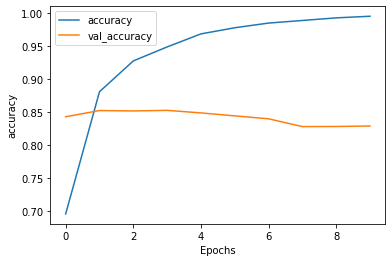

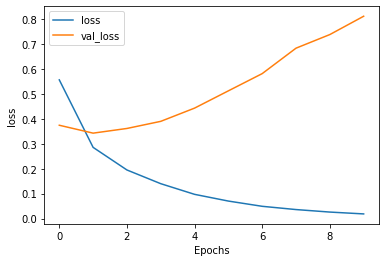

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## แบบฝึกหัด
ทดลองปรับ Hyperparameter ต่าง ๆ จนทำให้กราฟของ Accuracy สำหรับข้อมูลชุดเทรนและชุดทดสอบมีค่าสูงขึ้น ในขณะที่ Loss สำหรับข้อมูลชุดเทรนและชุดทดสอบมีค่าลดลง